In [1119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1120]:
import random

## Überwachtes Lernen

In [1121]:
from math import isnan
def create_dic(data):
    d = {}
    for col in data.columns:
        d[col] = data[col].dropna()

    return d

In [1122]:
def create_df(data, x):
    d = create_dic(data)
    data_out = pd.DataFrame()
    row = {}
    for i in range(x):    
        for key in d.keys():
            row[key] = random.choice(d[key])
        cache = pd.DataFrame(row, index=[len(data_out)])
        data_out = pd.concat([data_out, cache])
    return data_out

In [1237]:
df_in = pd.read_excel("Charakterisierungen_v2.xlsx",sheet_name=2)
data_in = create_df(df_in, 250000)
data_in

In [ ]:
# data_in.to_excel('random_datensatz_250.xlsx')

In [ ]:
# def clean_data_in(data): 
    
#     data['Typ der Kategorie'] = data[['Typ der Zielgröße', 'Typ der Kategorie']].apply(lambda x : 'Keine' if x[0]=='Numerisch' else x[1], axis=1)
#     data['Daten'] = data['Datenformat'].apply(lambda x : 'Strukturiert' if x=='Matrix' else 'Unstrukturiert')
    
#     def check_lerntyp(x):
#         if x[0] =='Gelabelt':
#             return 'Überwachtes Lernen'
#         elif x[0] =='Gemischt':
#             return 'Halbüberwachtes Lernen'
#         elif x[0] == 'Nicht gelabelt':
#             return 'Unüberwachtes Lernen'
#         elif x[0] == 'Feedback-Signal':
#             return 'Bestärkendes Lernen'
#         else:
#             return x[1]
    
#     def check_methode(x):
#         ub_lern_methoden = "Tree-Based Methods	Linear Models	Support Vector Machines	Neural Networks and Deep Learning	Bayesian Methods	K-Nearest Neighbors".split("\t")
#         unub_lern_methoden = "K-Means	Hierarchical Clustering	Apriori	PCA".split("\t")
#         halbub_lern_methoden = ub_lern_methoden
#         best_lern_methoden = "Monte Carlo	Q - Learning".split("\t")
#         if x[0] == 'Überwachtes Lernen' and x[1] not in ub_lern_methoden:
#             return random.choice(ub_lern_methoden)
#         elif x[0] == 'Unüberwachtes Lernen' and x[1] not in unub_lern_methoden:
#             return random.choice(unub_lern_methoden)
#         elif x[0] == 'Halbüberwachtes Lernen' and x[1] not in halbub_lern_methoden:
#             return random.choice(halbub_lern_methoden)
#         elif x[0] == 'Bestärkendes Lernen' and x[1] not in best_lern_methoden:
#             return random.choice(best_lern_methoden)
#         else:
#             return x[1]
        
    
        
#     data['Lerntyp'] = data[['Datentyp','Lerntyp']].apply(check_lerntyp,axis=1)
#     data['Methoden'] = data[['Lerntyp','Methoden']].apply(check_methode,axis=1)
        
    
    
#     ub_lern_methoden = "Tree-Based Methods	Linear Models	Support Vector Machines	Neural Networks and Deep Learning	Bayesian Methods	K-Nearest Neighbors".split("\t")
#     unub_lern_methoden = "K-Means	Hierarchical Clustering	Apriori	PCA".split("\t")
#     halbub_lern_methoden = ub_lern_methoden
#     best_lern_methoden = "Monte Carlo	Q - Learning".split("\t")
    
    
#     return data

In [ ]:
# df = clean_data_in(df)

In [ ]:
# df

# Erstellung des Basisdatensatzes

In [1161]:
def add_data(data):
    input_data = pd.read_excel("Charakterisierungen_v2.xlsx",sheet_name=3)
    for col in input_data.columns:
        np.random.shuffle(input_data[col].values)
    data = pd.concat([data, input_data])
    return data

In [1162]:
df = pd.DataFrame()

In [1163]:
# df = pd.read_excel("training_data.xlsx")
# len(df)

In [1164]:
l = len(df)
for i in range(5):
    df = add_data(df)
new_l = len(df)
new_l
print('______________________________')
print("Added rows: ", new_l - l)
print("Length of Dataframe: ", new_l)
print('______________________________')

______________________________
Added rows:  50
Length of Dataframe:  50
______________________________


In [1165]:
# df.to_excel("training_data.xlsx")

In [1166]:
# df.to_excel("backup_training_data_2.xlsx")

# Erstellung des Modells für die Data Augmentation

In [1167]:
unnamed = [unname for unname in df.columns if 'Unnamed' in unname]
df.drop(unnamed, axis=1, inplace=True)

In [1168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 9
Data columns (total 15 columns):
Datenformat                         50 non-null object
Datenqualität                       50 non-null object
Verfügbarkeit von Zeit              50 non-null object
Anspruch auf Genauigkeit            50 non-null object
Datentyp                            50 non-null object
Typ der Zielgröße                   50 non-null object
Rechenkapazität                     50 non-null object
Datenmenge                          50 non-null object
Folge von Entscheidungen            50 non-null object
Anzahl an Dimensionen (Features)    50 non-null object
Daten                               50 non-null object
Methoden                            50 non-null object
Methode zum Ziel                    50 non-null object
Lerntyp                             50 non-null object
Label                               50 non-null int64
dtypes: int64(1), object(14)
memory usage: 6.2+ KB


In [1169]:
df.head()

Datenformat Datenqualität Verfügbarkeit von Zeit Anspruch auf Genauigkeit  \
0        Text        Gering              Sehr Hoch                Sehr Hoch   
1        Bild     Sehr Hoch                   Hoch                     Hoch   
2         Ton        Gering              Sehr Hoch                Sehr Hoch   
3        Bild        Normal              Sehr Hoch                     Hoch   
4       Video        Normal                   Hoch                Sehr Hoch   

   Datentyp Typ der Zielgröße Rechenkapazität Datenmenge  \
0  Gelabelt             Keine       Sehr Hoch  Sehr Groß   
1  Gemischt             Keine          Normal  Sehr Groß   
2  Gelabelt             Keine          Normal  Sehr Groß   
3  Gemischt             Keine       Sehr Hoch  Sehr Groß   
4  Gelabelt             Keine            Hoch  Sehr Groß   

  Folge von Entscheidungen Anzahl an Dimensionen (Features)           Daten  \
0                     nein                             Hoch  Unstrukturiert   
1                     nein                             Hoch  Unstrukturiert   
2                     nein                             Hoch  Unstrukturiert   
3                     nein                             Hoch  Unstrukturiert   
4                     nein                             Hoch  Unstrukturiert   

  Methoden                        Methode zum Ziel               Lerntyp  \
0      PCA  Vereinfachen durch Dimension Reduction  Unüberwachtes Lernen   
1      PCA  Vereinfachen durch Dimension Reduction  Unüberwachtes Lernen   
2      PCA  Vereinfachen durch Dimension Reduction  Unüberwachtes Lernen   
3      PCA  Vereinfachen durch Dimension Reduction  Unüberwachtes Lernen   
4      PCA  Vereinfachen durch Dimension Reduction  Unüberwachtes Lernen   

   Label  
0      0  
1      0  
2      0  
3      0  
4      0

In [1170]:
df['Datenmenge'] = df['Datenmenge'].apply(lambda x: 'Klein' if x=='klein' else x)

In [1171]:
for feature in df.columns:
    df[[(str(feature) + '_' + str(col)) for col in pd.get_dummies(df[feature]).columns]] = pd.get_dummies(df[feature])
    df.drop(feature,axis=1,inplace=True)

In [1172]:
df.head()

Datenformat_Bild  Datenformat_Text  Datenformat_Ton  Datenformat_Video  \
0                 0                 1                0                  0   
1                 1                 0                0                  0   
2                 0                 0                1                  0   
3                 1                 0                0                  0   
4                 0                 0                0                  1   

   Datenqualität_Gering  Datenqualität_Normal  Datenqualität_Sehr Hoch  \
0                     1                     0                        0   
1                     0                     0                        1   
2                     1                     0                        0   
3                     0                     1                        0   
4                     0                     1                        0   

   Verfügbarkeit von Zeit_Hoch  Verfügbarkeit von Zeit_Sehr Hoch  \
0                            0                                 1   
1                            1                                 0   
2                            0                                 1   
3                            0                                 1   
4                            1                                 0   

   Anspruch auf Genauigkeit_Hoch  ...  Rechenkapazität_Sehr Hoch  \
0                              0  ...                          1   
1                              1  ...                          0   
2                              0  ...                          0   
3                              1  ...                          1   
4                              0  ...                          0   

   Datenmenge_Groß  Datenmenge_Sehr Groß  Folge von Entscheidungen_nein  \
0                0                     1                              1   
1                0                     1                              1   
2                0                     1                              1   
3                0                     1                              1   
4                0                     1                              1   

   Anzahl an Dimensionen (Features)_Hoch  Daten_Unstrukturiert  Methoden_PCA  \
0                                      1                     1             1   
1                                      1                     1             1   
2                                      1                     1             1   
3                                      1                     1             1   
4                                      1                     1             1   

   Methode zum Ziel_Vereinfachen durch Dimension Reduction  \
0                                                  1         
1                                                  1         
2                                                  1         
3                                                  1         
4                                                  1         

   Lerntyp_Unüberwachtes Lernen  Label_0  
0                             1        1  
1                             1        1  
2                             1        1  
3                             1        1  
4                             1        1  

[5 rows x 27 columns]

In [1173]:
df.columns

Index(['Datenformat_Bild', 'Datenformat_Text', 'Datenformat_Ton',
       'Datenformat_Video', 'Datenqualität_Gering', 'Datenqualität_Normal',
       'Datenqualität_Sehr Hoch', 'Verfügbarkeit von Zeit_Hoch',
       'Verfügbarkeit von Zeit_Sehr Hoch', 'Anspruch auf Genauigkeit_Hoch',
       'Anspruch auf Genauigkeit_Sehr Hoch', 'Datentyp_Feedback-Signal',
       'Datentyp_Gelabelt', 'Datentyp_Gemischt', 'Typ der Zielgröße_Keine',
       'Rechenkapazität_Hoch', 'Rechenkapazität_Normal',
       'Rechenkapazität_Sehr Hoch', 'Datenmenge_Groß', 'Datenmenge_Sehr Groß',
       'Folge von Entscheidungen_nein',
       'Anzahl an Dimensionen (Features)_Hoch', 'Daten_Unstrukturiert',
       'Methoden_PCA',
       'Methode zum Ziel_Vereinfachen durch Dimension Reduction',
       'Lerntyp_Unüberwachtes Lernen', 'Label_0'],
      dtype='object')

In [1174]:
df.to_excel("training_data_fein.xlsx")

In [1175]:
label_features = [label for label in df.columns if 'Label' in label]
label_features

['Label_0']

In [1238]:
df['Label'] = df['Label_1']
df.drop(label_features, axis=1, inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

In [ ]:
X = df.drop('Label', axis=1)
y = df['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f'features X_train: {len(X_train[1])}\nfeatures X_test: {len(X_test[1])}')

In [ ]:
corr_abs = pd.concat([X,y], axis=1).corr().iloc[-1:,:-1].T.abs().sort_values(ascending=False, by='Label').iloc[:10]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5,7), dpi=400)

sns.heatmap(corr_abs, annot=True, cmap='magma', cbar=False,ax=ax[0])
sns.barplot(x='Label', y=corr_abs.index, data=corr_abs, palette="magma")

ax[0].axes.get_xaxis().set_visible(False)
ax[1].axes.get_xaxis().set_visible(False)
ax[1].axes.get_yaxis().set_visible(False)

fig.suptitle('Am meisten korrelierende Features zu der Modellauswahl', fontsize=20)

sns.despine(bottom=True)

In [ ]:
from xgboost import XGBClassifier, plot_importance
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
xgbc_pred=xgbc.predict(X_test)
print(classification_report(y_test, np.round(xgbc_pred)))

In [ ]:
import lightgbm as lgb
lgbc = lgb.LGBMClassifier()
lgbc.fit(X_train, y_train,)
lgbc_pred=lgbc.predict(X_test)
print(classification_report(y_test, np.round(lgbc_pred)))

In [1222]:
def plot_importance(data, feature, title=None ,rows=15):
    corr_abs = data.iloc[:rows]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5,7), dpi=400)#, sharey=True)
    gs = fig.add_gridspec(1, 3)

    sns.heatmap(corr_abs, annot=True, cmap='magma_r', cbar=False,ax=ax[0])
    sns.barplot(x=feature, y=corr_abs.index, data=corr_abs, palette="magma")

    ax[0].axes.get_xaxis().set_visible(False)
    ax[1].axes.get_xaxis().set_visible(False)
    ax[1].axes.get_yaxis().set_visible(False)

    fig.suptitle(title, fontsize=20)
    sns.despine(bottom=True)

In [ ]:
dict_importance = xgbc.get_booster().get_score(importance_type="total_gain")
d={}

for index, value in dict_importance.items():
    d[X.columns[int(index[1:])]] = value
    
most_important_XGBoost = pd.DataFrame(d, index=['Total gain']).T
most_important_XGBoost = most_important_XGBoost[['Total gain']].sort_values(ascending=False, by='Total gain')

In [ ]:
plot_importance(most_important_XGBoost, 'Total gain', 'XGBoost Model [Total gain]')

In [ ]:
most_important_LightGBM = pd.DataFrame(lgbc.booster_.feature_importance(importance_type="gain"), index=X.columns, columns=['Total gain'])
most_important_LightGBM = most_important_LightGBM.sort_values(ascending=False, by='Total gain')

In [ ]:
plot_importance(most_important_LightGBM, 'Total gain', 'LightGBM Model [Total gain]')

# Erstellung des Random-Datensatzes

In [1177]:
for feature in data_in.columns:
    data_in[[(str(feature) + '_' + str(col)) for col in pd.get_dummies(data_in[feature]).columns]] = pd.get_dummies(data_in[feature])
    data_in.drop(feature,axis=1,inplace=True)

In [1178]:
different = [col for col in X.columns if col not in data_in.columns]
different

['Datenformat_Bild',
 'Datenformat_Keine',
 'Datenformat_Matrix',
 'Datenformat_Text',
 'Datenformat_Ton',
 'Datenformat_Video',
 'Datenqualität_Gering',
 'Datenqualität_Hoch',
 'Datenqualität_Keine',
 'Datenqualität_Normal',
 'Datenqualität_Sehr Hoch',
 'Verfügbarkeit von Zeit_Gering',
 'Verfügbarkeit von Zeit_Hoch',
 'Verfügbarkeit von Zeit_Normal',
 'Verfügbarkeit von Zeit_Sehr Hoch',
 'Anspruch auf Genauigkeit_Gering',
 'Anspruch auf Genauigkeit_Hoch',
 'Anspruch auf Genauigkeit_Normal',
 'Anspruch auf Genauigkeit_Sehr Hoch',
 'Datentyp_Feedback-Signal',
 'Datentyp_Gelabelt',
 'Datentyp_Gemischt',
 'Datentyp_Nicht gelabelt',
 'Typ der Zielgröße_Kategorisch',
 'Typ der Zielgröße_Keine',
 'Typ der Zielgröße_Numerisch',
 'Rechenkapazität_Gering',
 'Rechenkapazität_Hoch',
 'Rechenkapazität_Normal',
 'Rechenkapazität_Sehr Hoch',
 'Datenmenge_Groß',
 'Datenmenge_Keine',
 'Datenmenge_Klein',
 'Datenmenge_Neutral',
 'Datenmenge_Sehr Groß',
 'Folge von Entscheidungen_ja',
 'Folge von Entsch

In [1179]:
different = [col for col in data_in.columns if col not in X.columns]
different

['Datenformat_Bild_0',
 'Datenformat_Bild_1',
 'Datenformat_Keine_0',
 'Datenformat_Keine_1',
 'Datenformat_Matrix_0',
 'Datenformat_Matrix_1',
 'Datenformat_Text_0',
 'Datenformat_Text_1',
 'Datenformat_Ton_0',
 'Datenformat_Ton_1',
 'Datenformat_Video_0',
 'Datenformat_Video_1',
 'Datenqualität_Gering_0',
 'Datenqualität_Gering_1',
 'Datenqualität_Hoch_0',
 'Datenqualität_Hoch_1',
 'Datenqualität_Keine_0',
 'Datenqualität_Keine_1',
 'Datenqualität_Normal_0',
 'Datenqualität_Normal_1',
 'Datenqualität_Sehr Hoch_0',
 'Datenqualität_Sehr Hoch_1',
 'Verfügbarkeit von Zeit_Gering_0',
 'Verfügbarkeit von Zeit_Gering_1',
 'Verfügbarkeit von Zeit_Hoch_0',
 'Verfügbarkeit von Zeit_Hoch_1',
 'Verfügbarkeit von Zeit_Normal_0',
 'Verfügbarkeit von Zeit_Normal_1',
 'Verfügbarkeit von Zeit_Sehr Hoch_0',
 'Verfügbarkeit von Zeit_Sehr Hoch_1',
 'Anspruch auf Genauigkeit_Gering_0',
 'Anspruch auf Genauigkeit_Gering_1',
 'Anspruch auf Genauigkeit_Hoch_0',
 'Anspruch auf Genauigkeit_Hoch_1',
 'Anspruch

In [1180]:
different = [col for col in data_in.columns if col not in X.columns]
data_in.drop(different,axis=1,inplace=True)

In [1239]:
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.00, random_state=42)

X_test = scaler.transform(data_in)

In [ ]:
xgbc_pred_aug =xgbc.predict(X_test)
lgbc_pred_aug =lgbc.predict(X_test)

data_in['XGBoost'] = xgbc_pred_aug
data_in['LightGBM'] = lgbc_pred_aug

data_in['Label'] = data_in[['XGBoost','LightGBM']].apply(lambda x: 1 if x[0] == 1 and x[1] == 1 else 0, axis=1)

In [ ]:
data_in.head()

In [ ]:
not_equal = data_in['Label'][data_in['XGBoost'] != data_in['LightGBM']].value_counts()[0] / len(data_in) * 100
print(f'Percentage of values, by them XBoost and LightGBM are not equal:\n{not_equal}%')

In [ ]:
print('Percentage of right Model choice and wrong model choice')
print(data_in['Label'].value_counts()[1] / data_in['Label'].value_counts()[0] * 100)
data_in['Label'].value_counts()

Es ist unwahrscheinlich, dass aus einem Random-Sampling, 34% der Kombinationen richtitg sind

# Die Outputwerte werden in Klassen umgewandelt

In [1182]:
output = "Daten	Methoden	Methode zum Ziel	Lerntyp".split('\t')

In [1183]:
df_class = pd.read_excel("training_data.xlsx")
len(df_class)

5506

In [1184]:
df_random = pd.read_excel('random_datensatz_250.xlsx')
len(df_random)

250000

In [1185]:
df_class['Output'] = df_class[output].apply(list, axis=1)
df_class['Datenmenge'] = df_class['Datenmenge'].apply(lambda x: 'Klein' if x=='klein' else x)
unnamed = [unname for unname in df_class.columns if 'Unnamed' in unname]
df_class.drop(unnamed, axis=1, inplace=True)
df_class.drop(output, axis=1, inplace=True)
df_class_label = df_class['Label']
df_class = df_class[df_class['Label']==1]
df_class.drop('Label', axis=1, inplace=True)
df_class['Output'] = df_class['Output'].apply(str)

In [1186]:
df_class.head()

Anspruch auf Genauigkeit Anzahl an Dimensionen (Features) Datenformat  \
0                     Hoch                           Mittel      Matrix   
1                   Normal                             Hoch      Matrix   
2                Sehr Hoch                             Hoch      Matrix   
3                     Hoch                           Mittel      Matrix   
4                   Normal                           Gering      Matrix   

  Datenmenge Datenqualität  Datentyp Folge von Entscheidungen Rechenkapazität  \
0  Sehr Groß        Normal  Gelabelt                       ja          Normal   
1      Klein          Hoch  Gelabelt                     nein          Gering   
2    Neutral          Hoch  Gelabelt                     nein            Hoch   
3       Groß          Hoch  Gelabelt                       ja          Gering   
4    Neutral        Normal  Gelabelt                       ja            Hoch   

  Typ der Zielgröße Verfügbarkeit von Zeit  \
0       Kategorisch                 Normal   
1       Kategorisch                   Hoch   
2       Kategorisch                 Gering   
3       Kategorisch                   Hoch   
4       Kategorisch                   Hoch   

                                              Output  
0  ['Strukturiert', 'Tree-Based Methods', 'Klassi...  
1  ['Strukturiert', 'Tree-Based Methods', 'Klassi...  
2  ['Strukturiert', 'Tree-Based Methods', 'Klassi...  
3  ['Strukturiert', 'Tree-Based Methods', 'Klassi...  
4  ['Strukturiert', 'Tree-Based Methods', 'Klassi...

In [1187]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2470 entries, 0 to 5375
Data columns (total 11 columns):
Anspruch auf Genauigkeit            2470 non-null object
Anzahl an Dimensionen (Features)    2470 non-null object
Datenformat                         2470 non-null object
Datenmenge                          2470 non-null object
Datenqualität                       2470 non-null object
Datentyp                            2470 non-null object
Folge von Entscheidungen            2470 non-null object
Rechenkapazität                     2470 non-null object
Typ der Zielgröße                   2470 non-null object
Verfügbarkeit von Zeit              2470 non-null object
Output                              2470 non-null object
dtypes: object(11)
memory usage: 231.6+ KB


In [1188]:
df_random['Output'] = df_random[output].apply(list, axis=1)
df_random.drop(output, axis=1, inplace=True)
unnamed = [unname for unname in df_random.columns if 'Unnamed' in unname]
df_random.drop(unnamed, axis=1, inplace=True)
df_random['Output'] = df_random['Output'].apply(str)

In [1189]:
df_random.head()

Datenformat Datenqualität Verfügbarkeit von Zeit Anspruch auf Genauigkeit  \
0        Bild         Keine                 Gering                   Gering   
1       Video        Gering              Sehr Hoch                Sehr Hoch   
2       Keine     Sehr Hoch                 Gering                Sehr Hoch   
3      Matrix        Gering              Sehr Hoch                   Normal   
4       Video          Hoch                 Gering                   Gering   

          Datentyp Typ der Zielgröße Rechenkapazität Datenmenge  \
0         Gemischt       Kategorisch          Gering      Keine   
1         Gemischt             Keine          Normal      Klein   
2  Feedback-Signal         Numerisch            Hoch    Neutral   
3  Feedback-Signal             Keine       Sehr Hoch  Sehr Groß   
4         Gemischt         Numerisch          Gering      Keine   

  Folge von Entscheidungen Anzahl an Dimensionen (Features)  \
0                     nein                             Hoch   
1                     nein                           Mittel   
2                       ja                           Gering   
3                     nein                           Gering   
4                       ja                             Hoch   

                                              Output  
0  ['Strukturiert', 'Tree-Based Methods', 'Muster...  
1  ['Unstrukturiert', 'PCA', 'Klassifikation', 'B...  
2  ['Strukturiert', 'Q - Learning', 'Interaktion ...  
3  ['Unstrukturiert', 'Bayesian Methods', 'Klassi...  
4  ['Strukturiert', 'K-Means', 'Vereinfachen durc...

In [1190]:
df_random.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
Datenformat                         250000 non-null object
Datenqualität                       250000 non-null object
Verfügbarkeit von Zeit              250000 non-null object
Anspruch auf Genauigkeit            250000 non-null object
Datentyp                            250000 non-null object
Typ der Zielgröße                   250000 non-null object
Rechenkapazität                     250000 non-null object
Datenmenge                          250000 non-null object
Folge von Entscheidungen            250000 non-null object
Anzahl an Dimensionen (Features)    250000 non-null object
Output                              250000 non-null object
dtypes: object(11)
memory usage: 21.0+ MB


In [1191]:
# Falls die Kategorie nicht existiert, wirt zu einer existierenden Kategorie umgewandelt
classes = df_class['Output'].value_counts().index
def substitute_class(data, feature, classes):
    data[feature].apply(lambda x: x if x in classes else random.choice(classes))
    return data
test = substitute_class(df_random, 'Output', classes)

# Oversample 

### Annahme: Alle random-generierte Daten sind falsch

In [1192]:
from imblearn.over_sampling import ADASYN, SMOTE

In [1193]:
# Prüfen die Anzahl an Features
print('df_class: ',len(df_class.columns))
print('df_random: ',len(df_random.columns))

df_class:  11
df_random:  11


In [1194]:
features_x = [col for col in df_random.columns if col not in ['Distribution', 'Output']]
feature_y = 'Distribution'

In [1195]:
# Label für die Distributionen Erstellen
df_class[feature_y] = 'Analyse'
df_random[feature_y] = 'Random'

In [1196]:
# Features in die numerische Form umwandeln
def transform_dummy(data, features):
    for feature in features:
        data[[(str(feature) + '_' + str(col)) for col in pd.get_dummies(data[feature]).columns]] = pd.get_dummies(data[feature])
        data.drop(feature,axis=1,inplace=True)
    return data

def transform_dummy_clean(data, features):
    for feature in features:
        data[[str(col) for col in pd.get_dummies(data[feature]).columns]] = pd.get_dummies(data[feature])
        data.drop(feature,axis=1,inplace=True)
    return data

In [1197]:
df_class_dummy = transform_dummy(df_class.copy(), features_x)
df_class_dummy = transform_dummy_clean(df_class_dummy.copy(), ['Output'])

df_random_dummy = transform_dummy(df_random.copy(), features_x)
df_random_dummy = transform_dummy_clean(df_random_dummy.copy(), ['Output'])

In [1198]:
# Prüfen und löschen die Features, die unterschiedlich sind
different = [col for col in df_random_dummy.columns if col not in df_class_dummy.columns]
df_random_dummy.drop(different, axis=1, inplace=True)

In [1199]:
features_x = [col for col in df_random_dummy.columns if col not in ['Distribution']]
feature_y = 'Distribution'

In [1200]:
# Zusammenführung der beiden Datensätze
X = pd.concat([df_class_dummy[features_x],  df_random_dummy[features_x]])
y = pd.concat([df_class_dummy[feature_y] ,  df_random_dummy[feature_y]     ])
X, y = SMOTE().fit_resample(X, y)

In [1201]:
def plot_pie(data, feature):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7), dpi=200)
    ax.pie(data[feature].value_counts(), autopct='%1.1f%%',startangle=90, explode=[0.0025, 0.0025], 
           colors=['#C14242','#3F4ABF'],
           labels=data[feature].value_counts().index)
    ax.legend()
#     print(df[feature].value_counts())

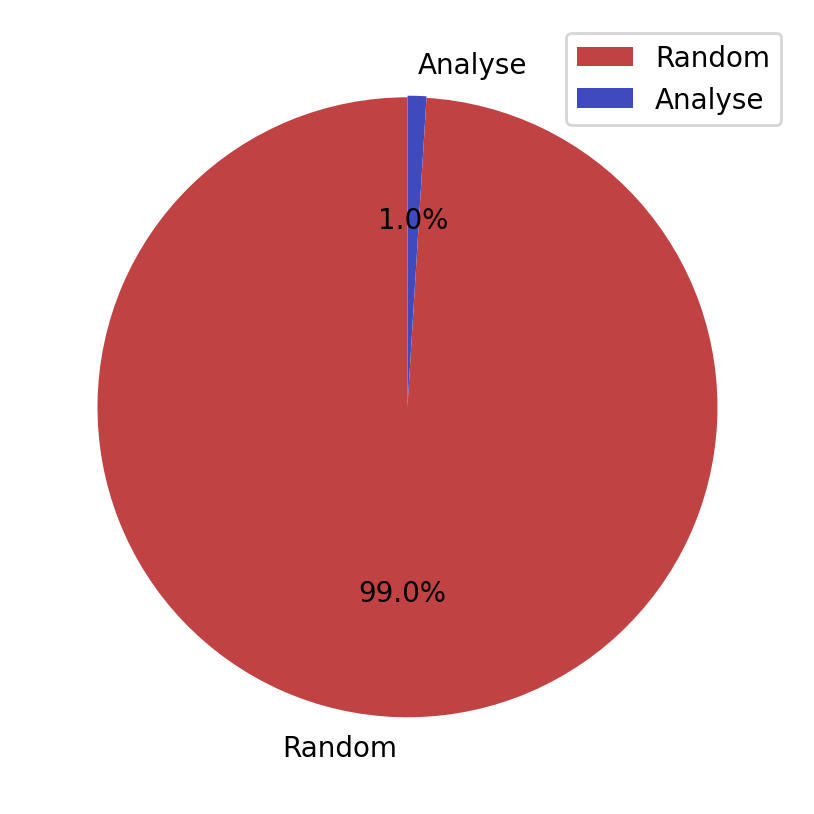

In [1202]:
plot_pie(pd.concat([df_class_dummy ,  df_random_dummy]), feature_y)

In [1203]:
def plot_pie2(data, feature):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7), dpi=200)
    ax.pie(data[feature].value_counts(), autopct='%1.1f%%',startangle=90, explode=[0.0025, 0.0025], 
           colors=['#3F4ABF','#C14242'],
           labels=data[feature].value_counts().index)
    ax.legend()

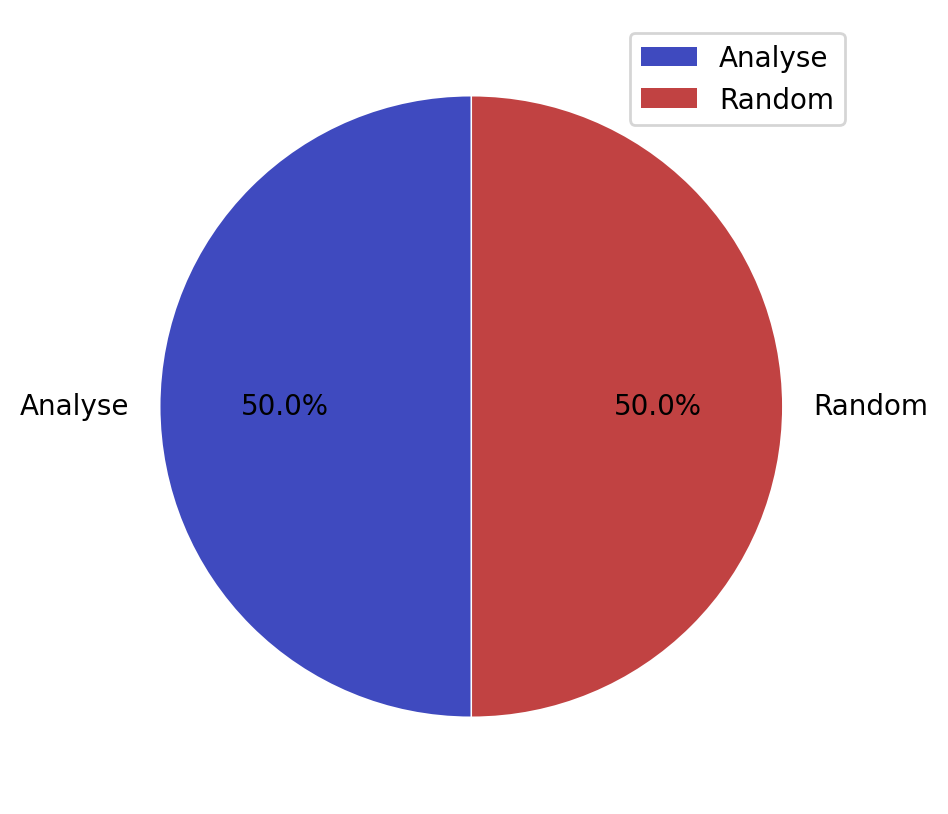

In [1204]:
plot_pie2(pd.DataFrame(y), feature_y, )

Nur die Daten aus der Analyse wird für das Training des Modells verwendet

In [1205]:
# Die Werte die größer als 1 sind, werden auf 1 korrigiert und kleiner als 0 werden auf null korrigiert
def corret_values(data):
    for col in data.columns:
        data[col] = data[col].apply(lambda x: 1 if x>1 else (0 if x < 0 else x))
    return data

In [1206]:
X = corret_values(X)
y = pd.DataFrame(y, columns=['Distribution'], index=range(len(y)))

In [1207]:
# Zusammenführung von X und y
data_SMOTE = pd.concat([X,y],axis=1)
data_SMOTE = data_SMOTE[data_SMOTE['Distribution']=='Analyse']

In [1208]:
data_SMOTE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 0 to 499999
Data columns (total 76 columns):
Datenformat_Bild                                                                                           250000 non-null int64
Datenformat_Keine                                                                                          250000 non-null int64
Datenformat_Matrix                                                                                         250000 non-null int64
Datenformat_Text                                                                                           250000 non-null int64
Datenformat_Ton                                                                                            250000 non-null int64
Datenformat_Video                                                                                          250000 non-null int64
Datenqualität_Gering                                                                                       250000 n

In [1209]:
# Transformation der Output-Werte zurück in Kategorien
outputs = [value for value in data_SMOTE if '[' in value]
data_SMOTE['Output'] = data_SMOTE[outputs].idxmax(axis=1)
data_SMOTE.drop(outputs, axis=1, inplace=True)

# Training Modell mit den Richtigen Werten

In [1210]:
# data_SMOTE.to_csv('data_SMOTE.csv')

In [1211]:
features_x = [col for col in data_SMOTE.columns if col in ['Output', 'Distribution']]
feature_y = 'Output'

X = data_SMOTE.drop(features_x ,axis=1)
y = data_SMOTE['Output']

In [1212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f'features X_train: {len(X_train[1])}\nfeatures X_test: {len(X_test[1])}')

features X_train: 40
features X_test: 40


In [1213]:
X_train

array([[-0.23878726, -0.14945726, -1.81471471, ...,  1.18551744,
        -0.64010217, -0.64474379],
       [-0.23878726, -0.14945726, -1.81471471, ...,  1.18551744,
        -0.64010217, -0.64474379],
       [-0.23878726, -0.14945726,  0.5510508 , ...,  1.18551744,
        -0.64010217, -0.64474379],
       ...,
       [-0.23878726, -0.14945726,  0.5510508 , ..., -0.84351353,
        -0.64010217,  1.55100369],
       [-0.23878726, -0.14945726,  0.5510508 , ..., -0.84351353,
        -0.64010217,  1.55100369],
       [-0.23878726, -0.14945726,  0.5510508 , ...,  1.18551744,
        -0.64010217, -0.64474379]])

In [1214]:
from xgboost import XGBClassifier, plot_importance
xgbc = XGBClassifier(objective='multi:softmax')
xgbc.fit(X_train, y_train)
xgbc_pred=xgbc.predict(X_test)
print(classification_report(y_test, xgbc_pred))

                                                                                                         precision    recall  f1-score   support

  ['Strukturiert', 'Autoencoding NN', 'Vereinfachen durch Dimension Reduction', 'Unüberwachtes Lernen']       0.88      0.90      0.89      1312
                       ['Strukturiert', 'Bayesian Methods', 'Klassifikation', 'Halbüberwachtes Lernen']       0.92      0.98      0.95       673
                           ['Strukturiert', 'Bayesian Methods', 'Klassifikation', 'Überwachtes Lernen']       0.96      0.91      0.93       718
                           ['Strukturiert', 'Bayesian Methods', 'Regression', 'Halbüberwachtes Lernen']       0.91      0.91      0.91      1136
                               ['Strukturiert', 'Bayesian Methods', 'Regression', 'Überwachtes Lernen']       0.99      0.88      0.93       683
                  ['Strukturiert', 'K-Means', 'Muster erkennen und Clustering', 'Unüberwachtes Lernen']       0.99      0.98     

In [1215]:
import lightgbm as lgb
lgbc = lgb.LGBMClassifier(objective='multiclass')
lgbc.fit(X_train, y_train,)
lgbc_pred=lgbc.predict(X_test)
print(classification_report(y_test, lgbc_pred))

                                                                                                         precision    recall  f1-score   support

  ['Strukturiert', 'Autoencoding NN', 'Vereinfachen durch Dimension Reduction', 'Unüberwachtes Lernen']       0.88      0.89      0.89      1312
                       ['Strukturiert', 'Bayesian Methods', 'Klassifikation', 'Halbüberwachtes Lernen']       0.92      0.98      0.95       673
                           ['Strukturiert', 'Bayesian Methods', 'Klassifikation', 'Überwachtes Lernen']       0.99      0.88      0.93       718
                           ['Strukturiert', 'Bayesian Methods', 'Regression', 'Halbüberwachtes Lernen']       0.91      0.91      0.91      1136
                               ['Strukturiert', 'Bayesian Methods', 'Regression', 'Überwachtes Lernen']       0.99      0.88      0.93       683
                  ['Strukturiert', 'K-Means', 'Muster erkennen und Clustering', 'Unüberwachtes Lernen']       0.99      0.98     

In [1216]:
from sklearn.metrics import precision_score
print('precision report:')
print('XGBoost Model: ',precision_score(y_test, xgbc_pred, average='weighted'))
print('LightGBM Model: ',precision_score(y_test, lgbc_pred, average='weighted'))
from sklearn.metrics import recall_score
print('recall report:')
print('XGBoost Model: ',recall_score(y_test, xgbc_pred, average='weighted'))
print('LightGBM Model: ',recall_score(y_test, lgbc_pred, average='weighted'))
from sklearn.metrics import f1_score
print('f1_score report:')
print('XGBoost Model: ',f1_score(y_test, xgbc_pred, average='weighted'))
print('LightGBM Model: ',f1_score(y_test, lgbc_pred, average='weighted'))

precision report:
XGBoost Model:  0.9605702471532962
LightGBM Model:  0.960467378175175
recall report:
XGBoost Model:  0.9600533333333333
LightGBM Model:  0.9599733333333333
f1_score report:
XGBoost Model:  0.9600608335062345
LightGBM Model:  0.9599644808551271


In [1217]:
pd.Series(xgbc_pred).value_counts()

['Strukturiert', 'K-Means', 'Muster erkennen und Clustering', 'Unüberwachtes Lernen']                      4699
['Strukturiert', 'PCA', 'Vereinfachen durch Dimension Reduction', 'Unüberwachtes Lernen']                  2042
['Unstrukturiert', 'Neural Networks and Deep Learning', 'Regression', 'Halbüberwachtes Lernen']            1878
['Unstrukturiert', 'SARSA', 'Interaktion statt bereitgestellten Daten', 'Bestärkendes Lernen']             1614
['Unstrukturiert', 'Q - Learning', 'Interaktion statt bereitgestellten Daten', 'Bestärkendes Lernen']      1555
['Strukturiert', 'Tree-Based Methods', 'Regression', 'Überwachtes Lernen']                                 1455
['Strukturiert', 'Autoencoding NN', 'Vereinfachen durch Dimension Reduction', 'Unüberwachtes Lernen']      1346
['Strukturiert', 'Neural Networks and Deep Learning', 'Klassifikation', 'Halbüberwachtes Lernen']          1313
['Strukturiert', 'Neural Networks and Deep Learning', 'Regression', 'Halbüberwachtes Lernen']           

In [1218]:
pd.Series(lgbc_pred).value_counts()

['Strukturiert', 'K-Means', 'Muster erkennen und Clustering', 'Unüberwachtes Lernen']                      4731
['Strukturiert', 'PCA', 'Vereinfachen durch Dimension Reduction', 'Unüberwachtes Lernen']                  2010
['Unstrukturiert', 'Neural Networks and Deep Learning', 'Regression', 'Halbüberwachtes Lernen']            1878
['Unstrukturiert', 'SARSA', 'Interaktion statt bereitgestellten Daten', 'Bestärkendes Lernen']             1614
['Unstrukturiert', 'Q - Learning', 'Interaktion statt bereitgestellten Daten', 'Bestärkendes Lernen']      1555
['Strukturiert', 'Tree-Based Methods', 'Regression', 'Überwachtes Lernen']                                 1455
['Strukturiert', 'Autoencoding NN', 'Vereinfachen durch Dimension Reduction', 'Unüberwachtes Lernen']      1318
['Strukturiert', 'Neural Networks and Deep Learning', 'Klassifikation', 'Halbüberwachtes Lernen']          1313
['Strukturiert', 'Support Vector Machines', 'Regression', 'Halbüberwachtes Lernen']                     

In [1219]:
dict_importance = xgbc.get_booster().get_score(importance_type="total_gain")
d={}

for index, value in dict_importance.items():
    d[X.columns[int(index[1:])]] = value
    
most_important_XGBoost = pd.DataFrame(d, index=['Total gain']).T
most_important_XGBoost = most_important_XGBoost[['Total gain']].sort_values(ascending=False, by='Total gain')

In [1220]:
most_important_XGBoost

Total gain
Datentyp_Gelabelt                        428673.288569
Datenformat_Matrix                       270366.608165
Typ der Zielgröße_Kategorisch            255488.007257
Typ der Zielgröße_Numerisch              210269.217055
Datentyp_Feedback-Signal                 146599.524592
Verfügbarkeit von Zeit_Sehr Hoch         143112.687223
Datentyp_Nicht gelabelt                  133727.875896
Typ der Zielgröße_Keine                  121365.698271
Anspruch auf Genauigkeit_Sehr Hoch       105868.766903
Datenmenge_Klein                          97697.909066
Verfügbarkeit von Zeit_Hoch               95930.447349
Anspruch auf Genauigkeit_Gering           95412.580711
Anzahl an Dimensionen (Features)_Hoch     79554.542155
Verfügbarkeit von Zeit_Gering             75153.852604
Rechenkapazität_Sehr Hoch                 70588.969233
Rechenkapazität_Hoch                      68448.434199
Anspruch auf Genauigkeit_Normal           67741.531572
Anzahl an Dimensionen (Features)_Gering   66227.323497
Datenmenge_Neutral                        64380.895870
Rechenkapazität_Gering                    61039.122073
Datenmenge_Sehr Groß                      56783.520487
Folge von Entscheidungen_ja               54753.862498
Anspruch auf Genauigkeit_Hoch             52364.197250
Datentyp_Gemischt                         47275.433731
Datenqualität_Sehr Hoch                   46636.187496
Datenqualität_Gering                      41908.897711
Datenmenge_Groß                           28378.472531
Datenqualität_Hoch                        24789.827454
Datenqualität_Keine                       23927.928323
Verfügbarkeit von Zeit_Normal             22171.349576
Rechenkapazität_Normal                    17591.305520
Datenmenge_Keine                          16936.191336
Datenqualität_Normal                      15615.594848
Anzahl an Dimensionen (Features)_Mittel   12187.758047
Datenformat_Video                          8111.252618
Datenformat_Text                           4440.221012
Datenformat_Ton                            4392.481445
Datenformat_Bild                           3722.201851
Datenformat_Keine                          3100.741890

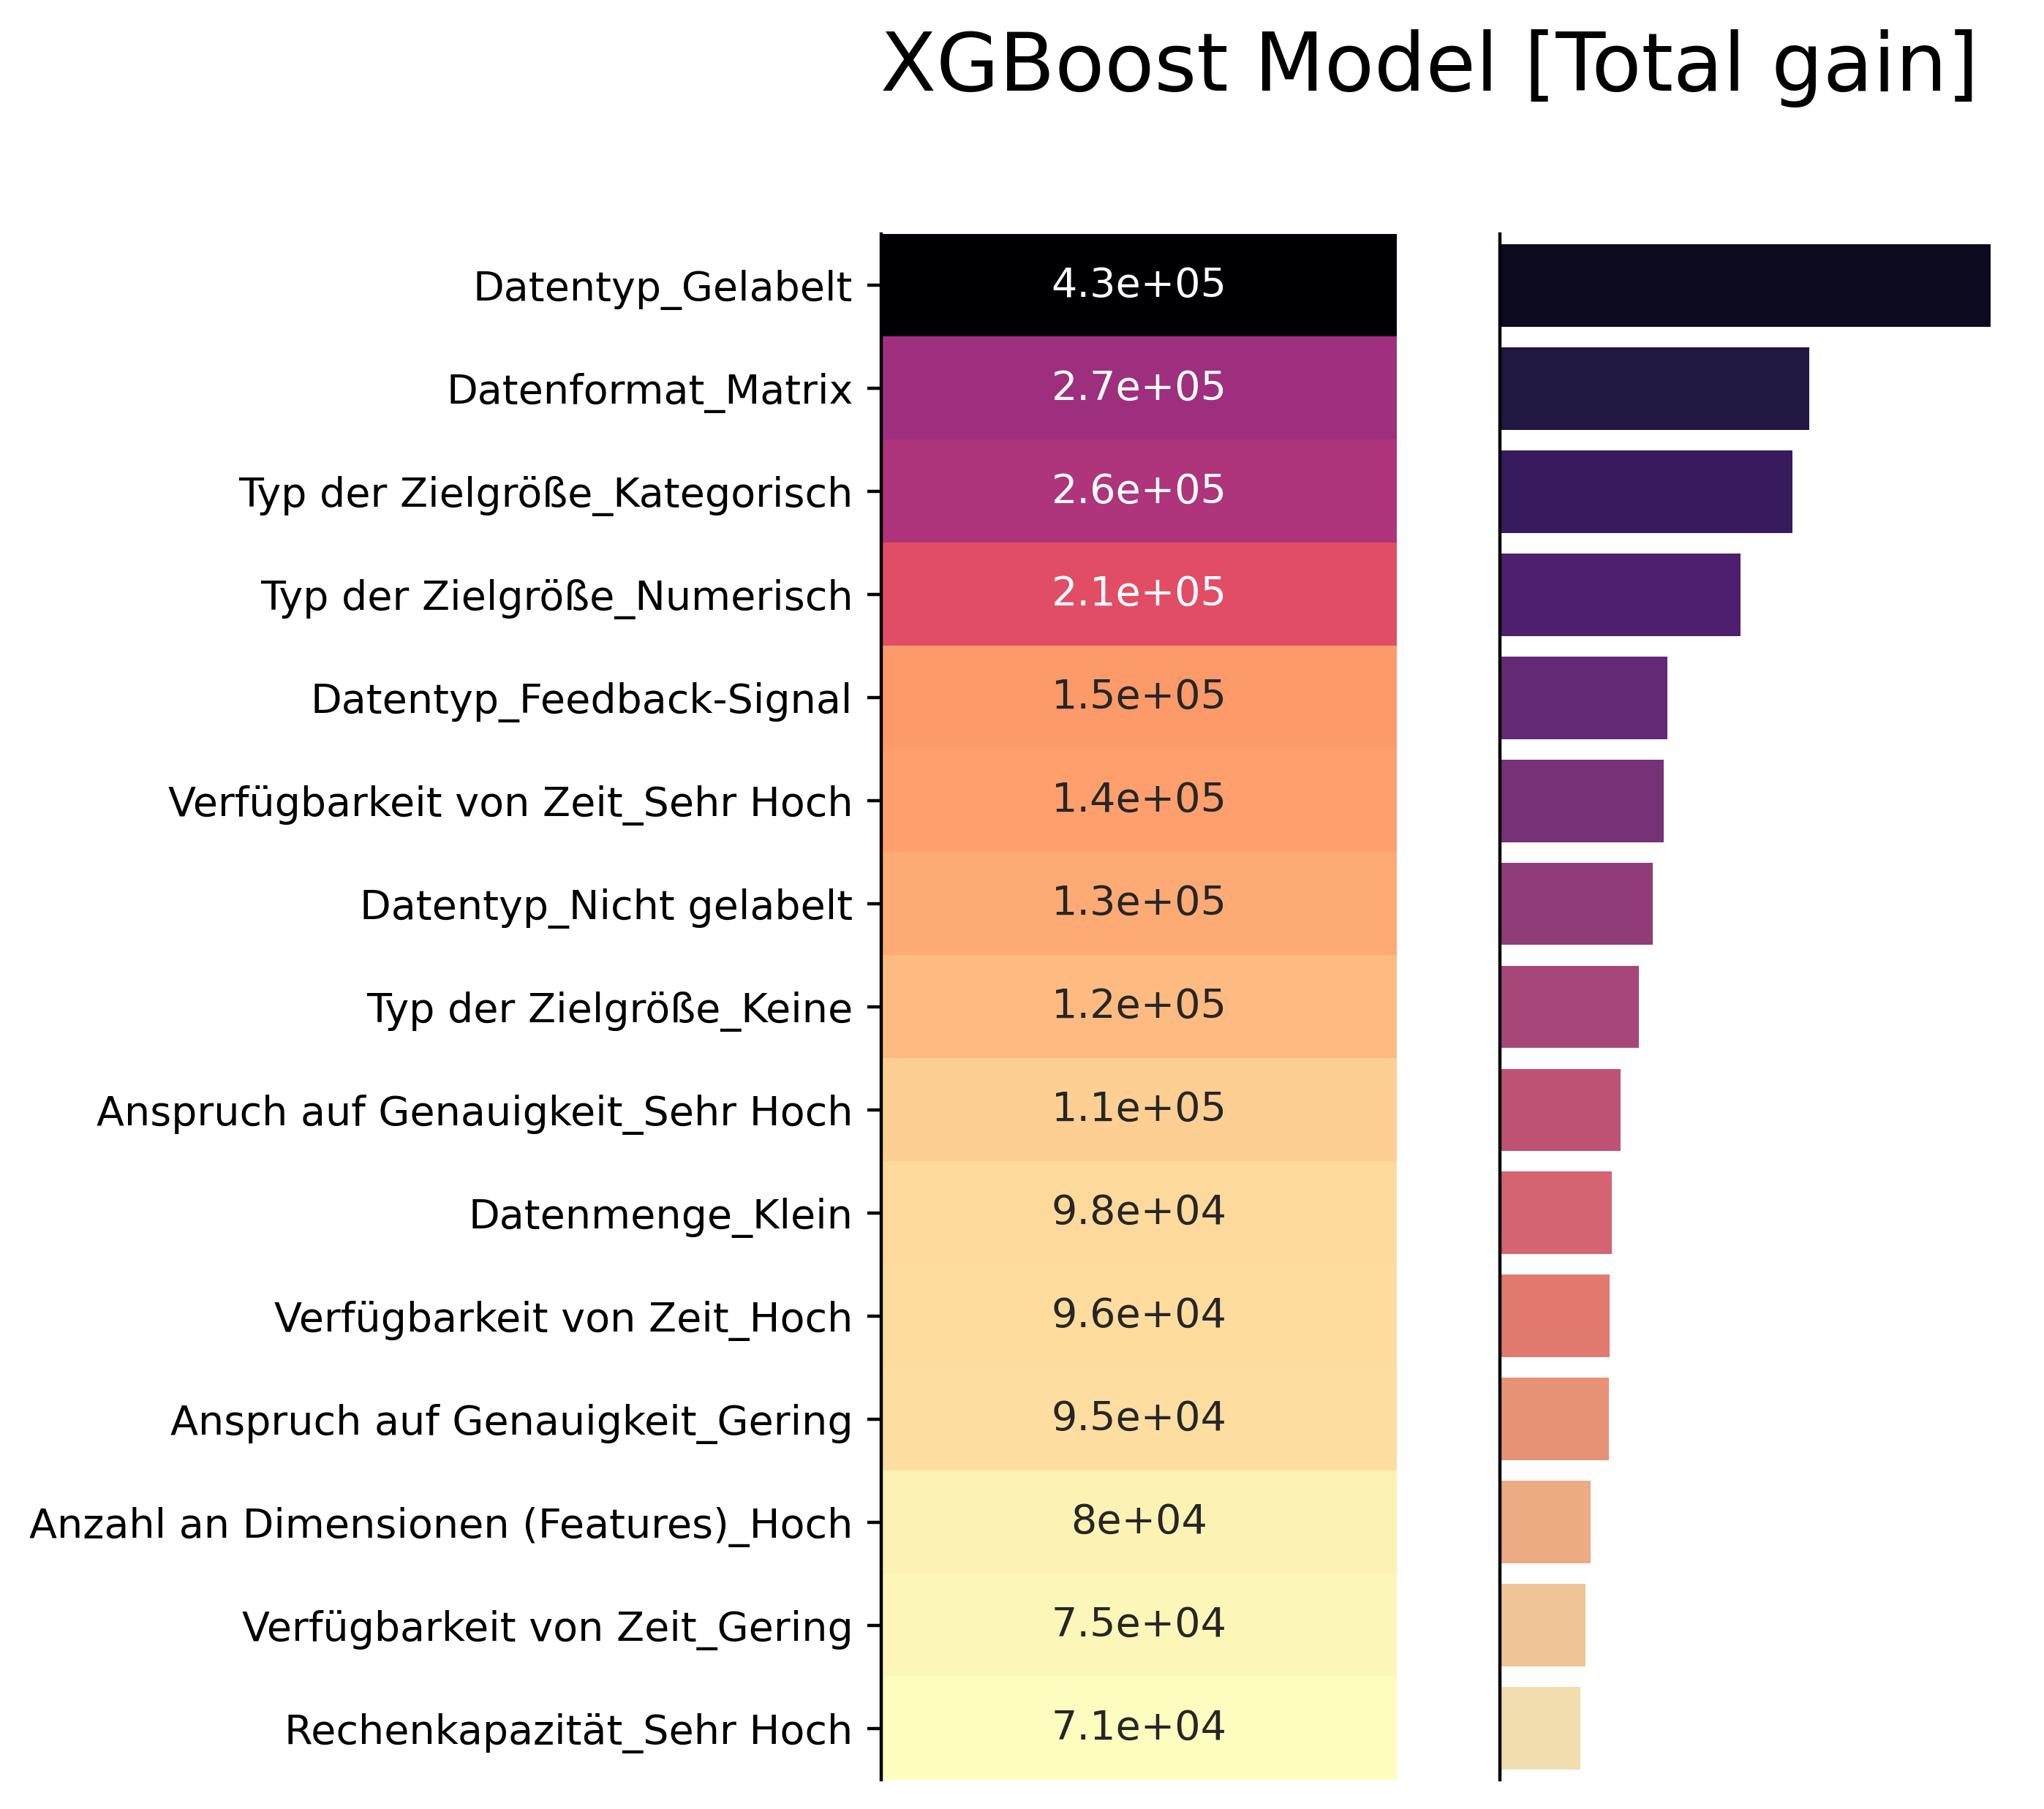

In [1223]:
plot_importance(most_important_XGBoost, 'Total gain', 'XGBoost Model [Total gain]')

In [1224]:
most_important_LightGBM = pd.DataFrame(lgbc.booster_.feature_importance(importance_type="gain"), index=X.columns, columns=['Total gain'])
most_important_LightGBM = most_important_LightGBM.sort_values(ascending=False, by='Total gain')

In [1225]:
most_important_LightGBM

Total gain
Datentyp_Gelabelt                        1.021315e+06
Typ der Zielgröße_Kategorisch            6.916421e+05
Datenformat_Matrix                       6.243296e+05
Typ der Zielgröße_Numerisch              6.021233e+05
Datentyp_Feedback-Signal                 4.024035e+05
Datentyp_Nicht gelabelt                  3.599910e+05
Typ der Zielgröße_Keine                  2.480816e+05
Verfügbarkeit von Zeit_Gering            2.415882e+05
Anspruch auf Genauigkeit_Sehr Hoch       2.275123e+05
Verfügbarkeit von Zeit_Sehr Hoch         2.097145e+05
Datenmenge_Klein                         2.027218e+05
Anspruch auf Genauigkeit_Gering          1.968990e+05
Rechenkapazität_Hoch                     1.779607e+05
Anspruch auf Genauigkeit_Hoch            1.721783e+05
Verfügbarkeit von Zeit_Hoch              1.638461e+05
Rechenkapazität_Sehr Hoch                1.626263e+05
Rechenkapazität_Gering                   1.600361e+05
Anzahl an Dimensionen (Features)_Hoch    1.424390e+05
Datenqualität_Gering                     1.373605e+05
Anzahl an Dimensionen (Features)_Gering  1.343822e+05
Datenmenge_Sehr Groß                     1.330845e+05
Anspruch auf Genauigkeit_Normal          1.328543e+05
Datenqualität_Sehr Hoch                  1.124703e+05
Verfügbarkeit von Zeit_Normal            1.030717e+05
Datenqualität_Hoch                       9.292195e+04
Datenmenge_Neutral                       9.108200e+04
Datenmenge_Groß                          7.857197e+04
Folge von Entscheidungen_ja              7.843672e+04
Datenqualität_Normal                     6.597366e+04
Rechenkapazität_Normal                   5.254526e+04
Datenformat_Video                        2.802129e+04
Anzahl an Dimensionen (Features)_Mittel  2.722716e+04
Datenmenge_Keine                         2.387824e+04
Datenformat_Ton                          1.870502e+04
Datenqualität_Keine                      1.791159e+04
Datentyp_Gemischt                        1.616935e+04
Datenformat_Bild                         1.405170e+04
Folge von Entscheidungen_nein            1.385213e+04
Datenformat_Keine                        9.406414e+03
Datenformat_Text                         8.884431e+03

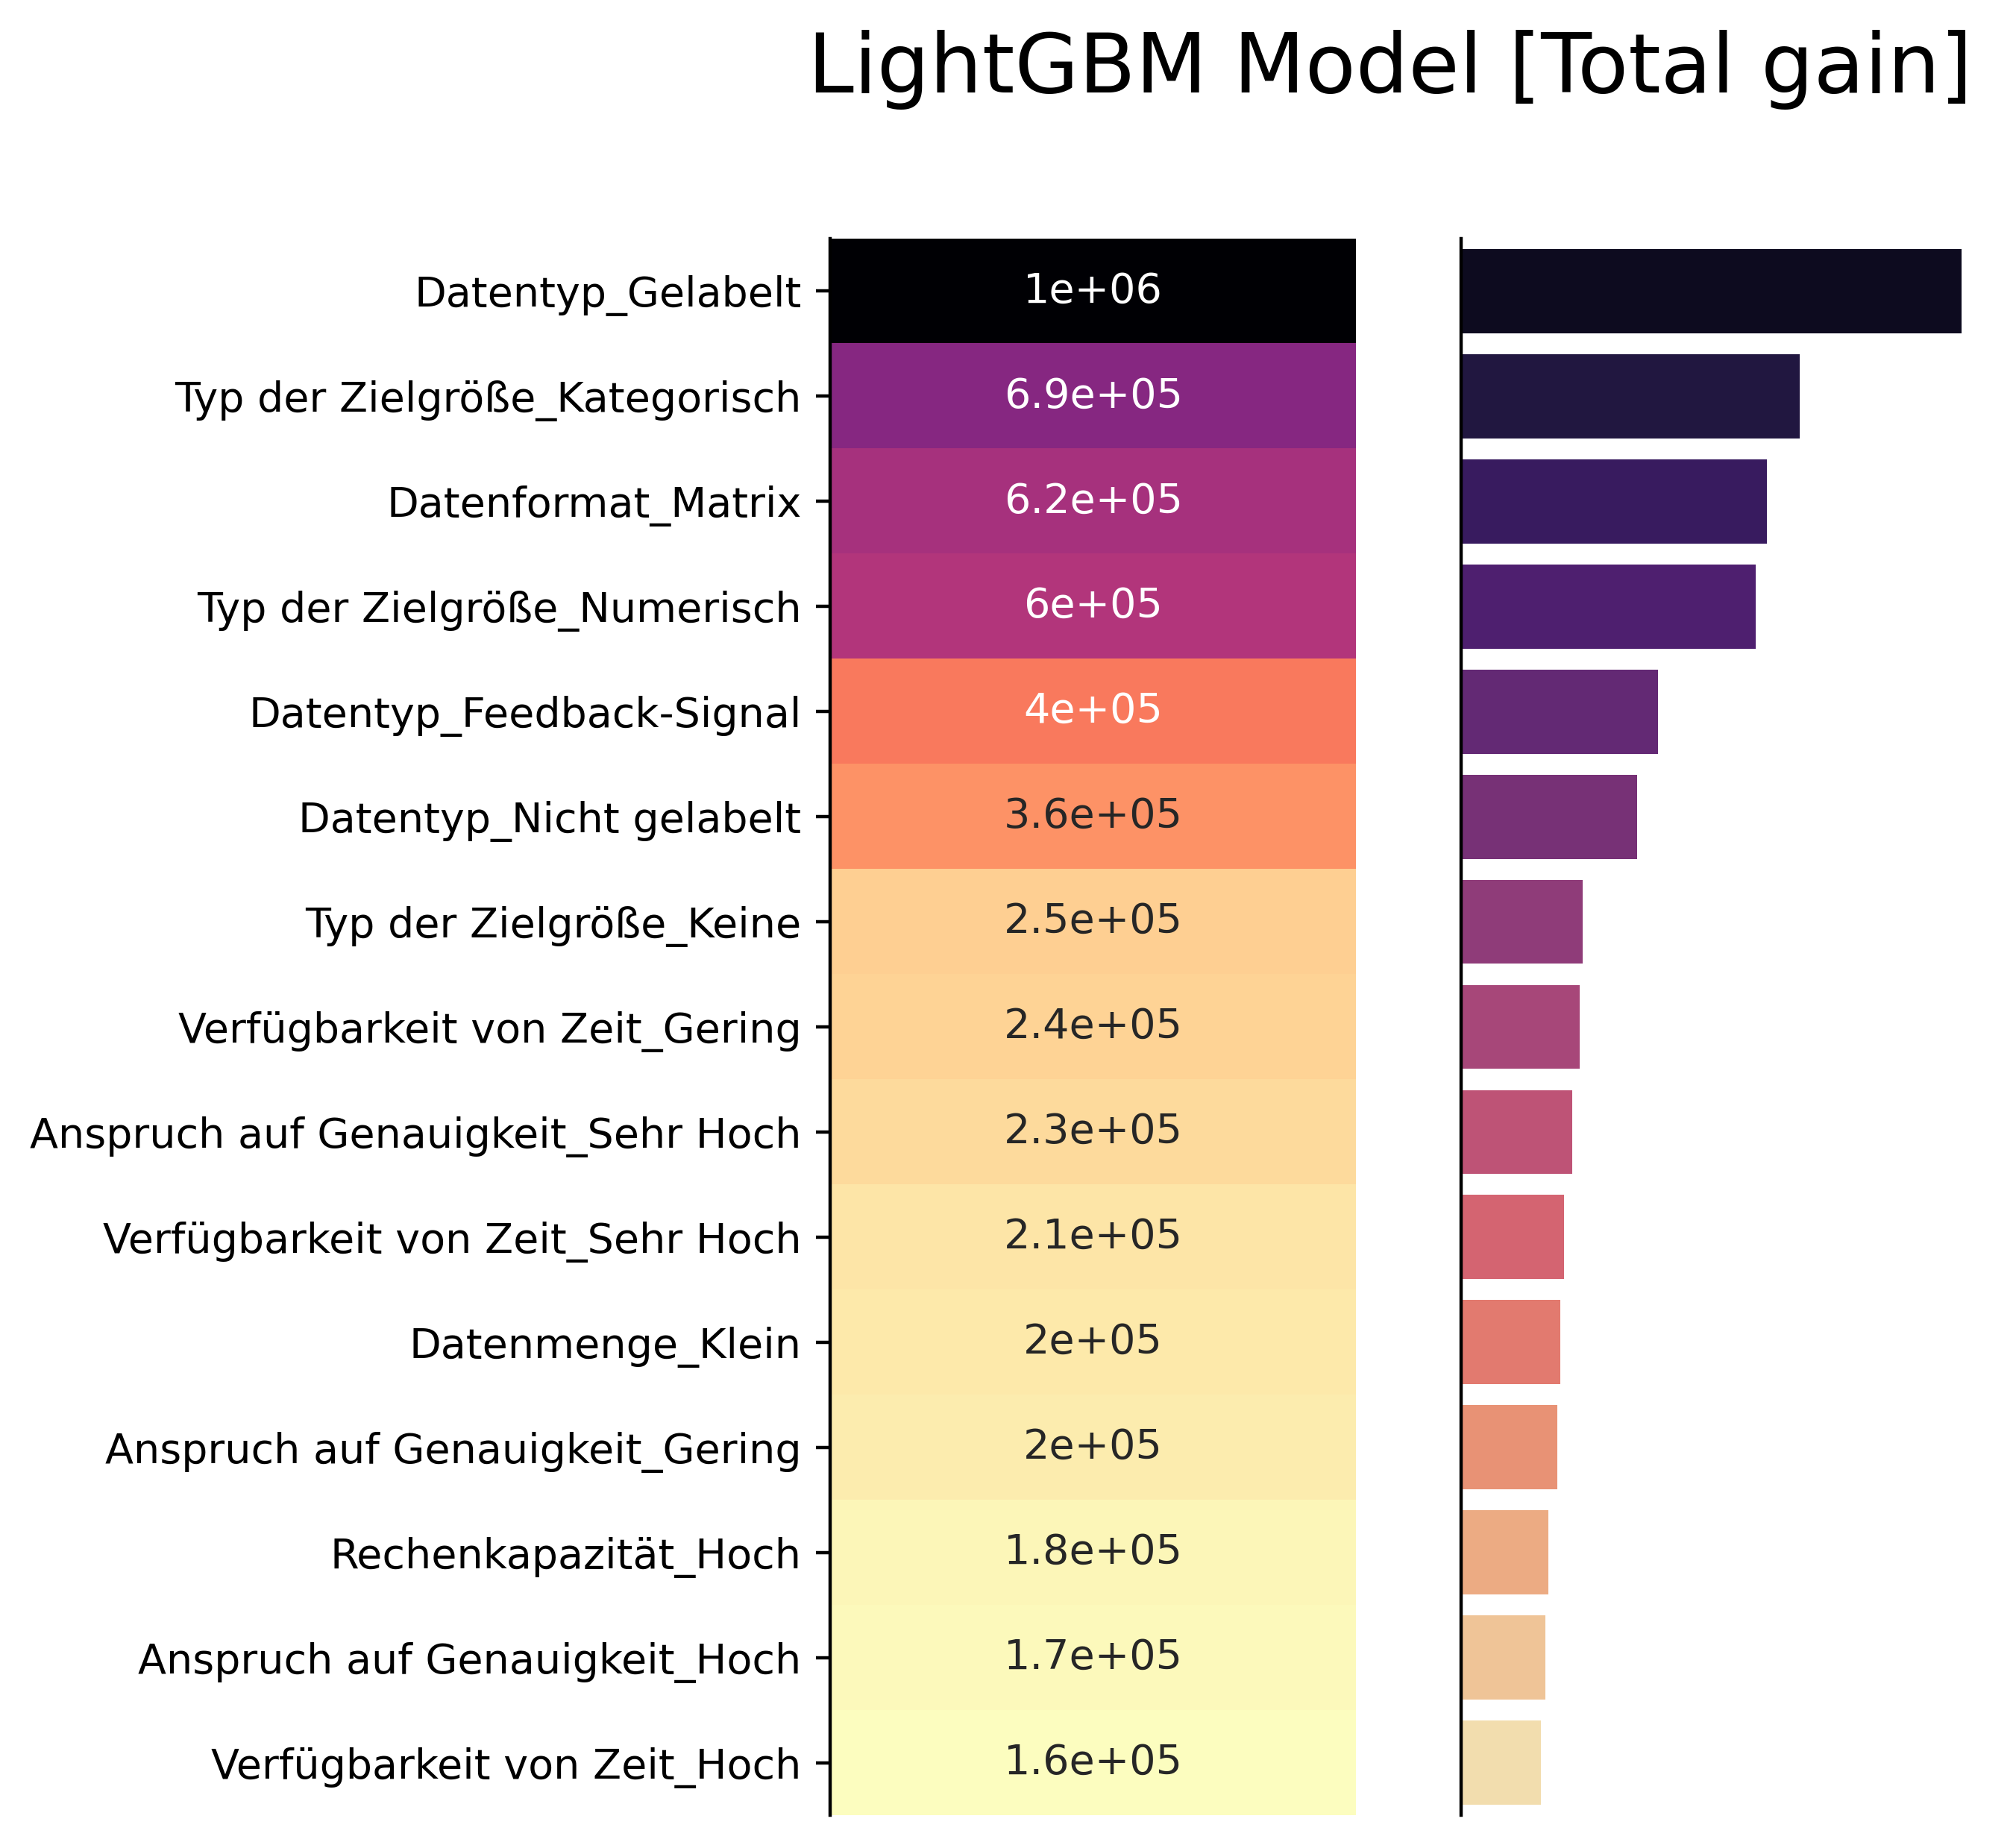

In [1226]:
plot_importance(most_important_LightGBM, 'Total gain', 'LightGBM Model [Total gain]')

In [1227]:
different1 = [x for x in most_important_LightGBM.index[:10] if x not in most_important_XGBoost.index[:10]]
different2 = [x for x in most_important_XGBoost.index[:10] if x not in most_important_LightGBM.index[:10]]
print(different1)
print(different2)
# most_important_XGBoost

['Verfügbarkeit von Zeit_Gering']
['Datenmenge_Klein']


In [1228]:
different3 = [x for x in most_important_LightGBM.index[:5] if x not in most_important_XGBoost.index[:5]]
different4 = [x for x in most_important_XGBoost.index[:5] if x not in most_important_LightGBM.index[:5]]
print(different3)
print(different4)

[]
[]


In [1229]:
print(len(most_important_LightGBM))
print(len(most_important_XGBoost))

40
39


In [1230]:
# xgbc_pred_aug =xgbc.predict(X_test)
# lgbc_pred_aug =lgbc.predict(X_test)

# data_in['XGBoost'] = xgbc_pred_aug
# data_in['LightGBM'] = lgbc_pred_aug

# data_in['Label'] = data_in[['XGBoost','LightGBM']].apply(lambda x: 1 if x[0] == 1 and x[1] == 1 else 0, axis=1)

In [1231]:
# not_equal = data_in['Label'][data_in['XGBoost'] != data_in['LightGBM']].value_counts()[0] / len(data_in) * 100
# print(f'Percentage of values, by them XBoost and LightGBM are not equal:\n{not_equal}%')
# print('Percentage of right Model choice and wrong model choice')
# print(data_in['Label'].value_counts()[1] / data_in['Label'].value_counts()[0] * 100)
# data_in['Label'].value_counts()

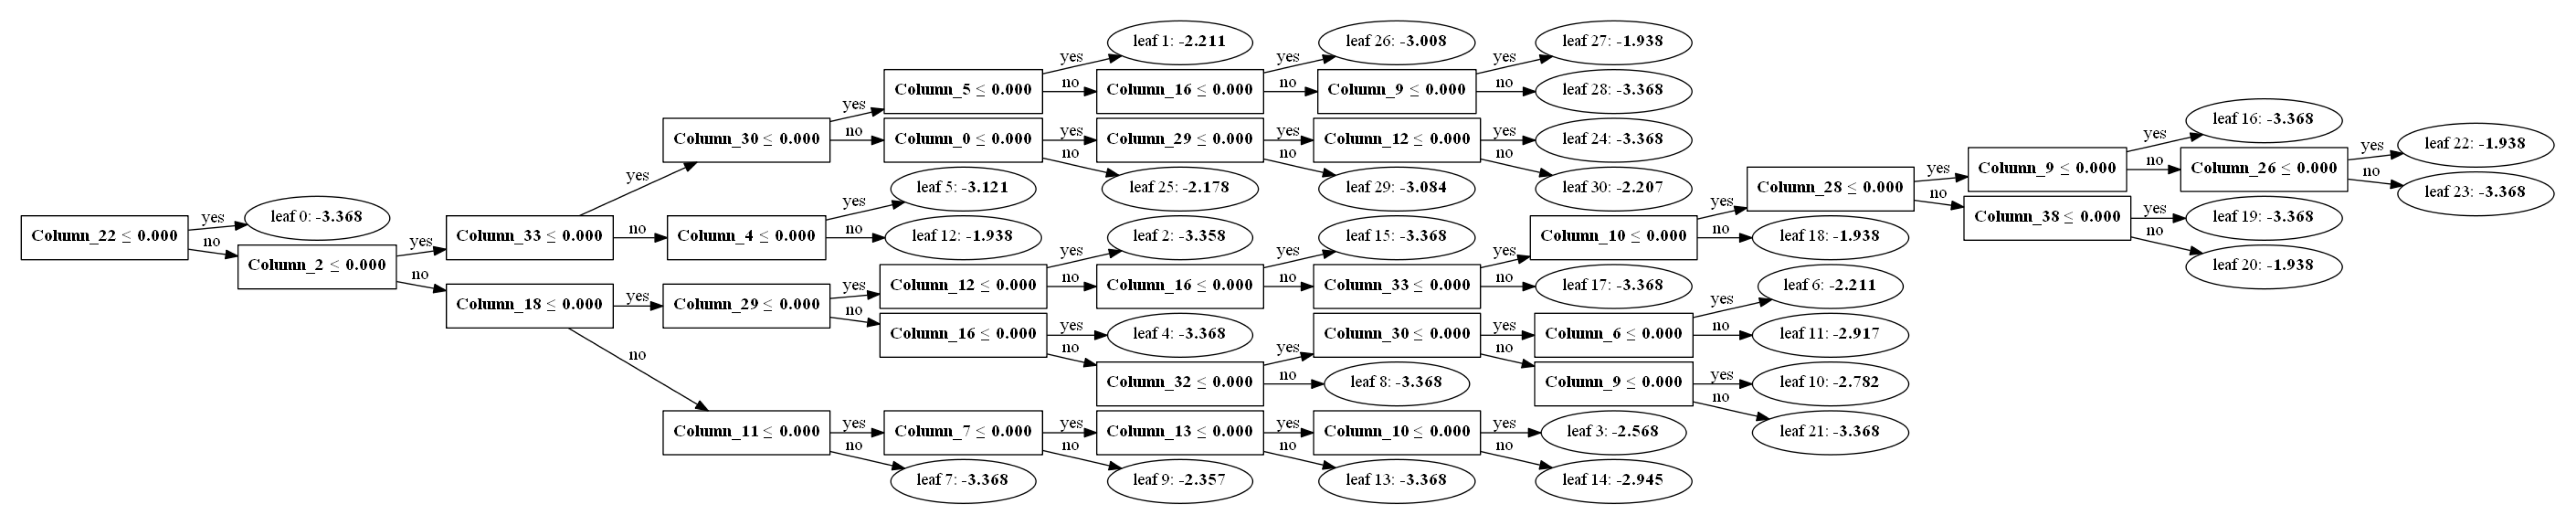

In [1232]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20), dpi=400)
lgb.plot_tree(lgbc, ax=ax, tree_index=0, precision=3)

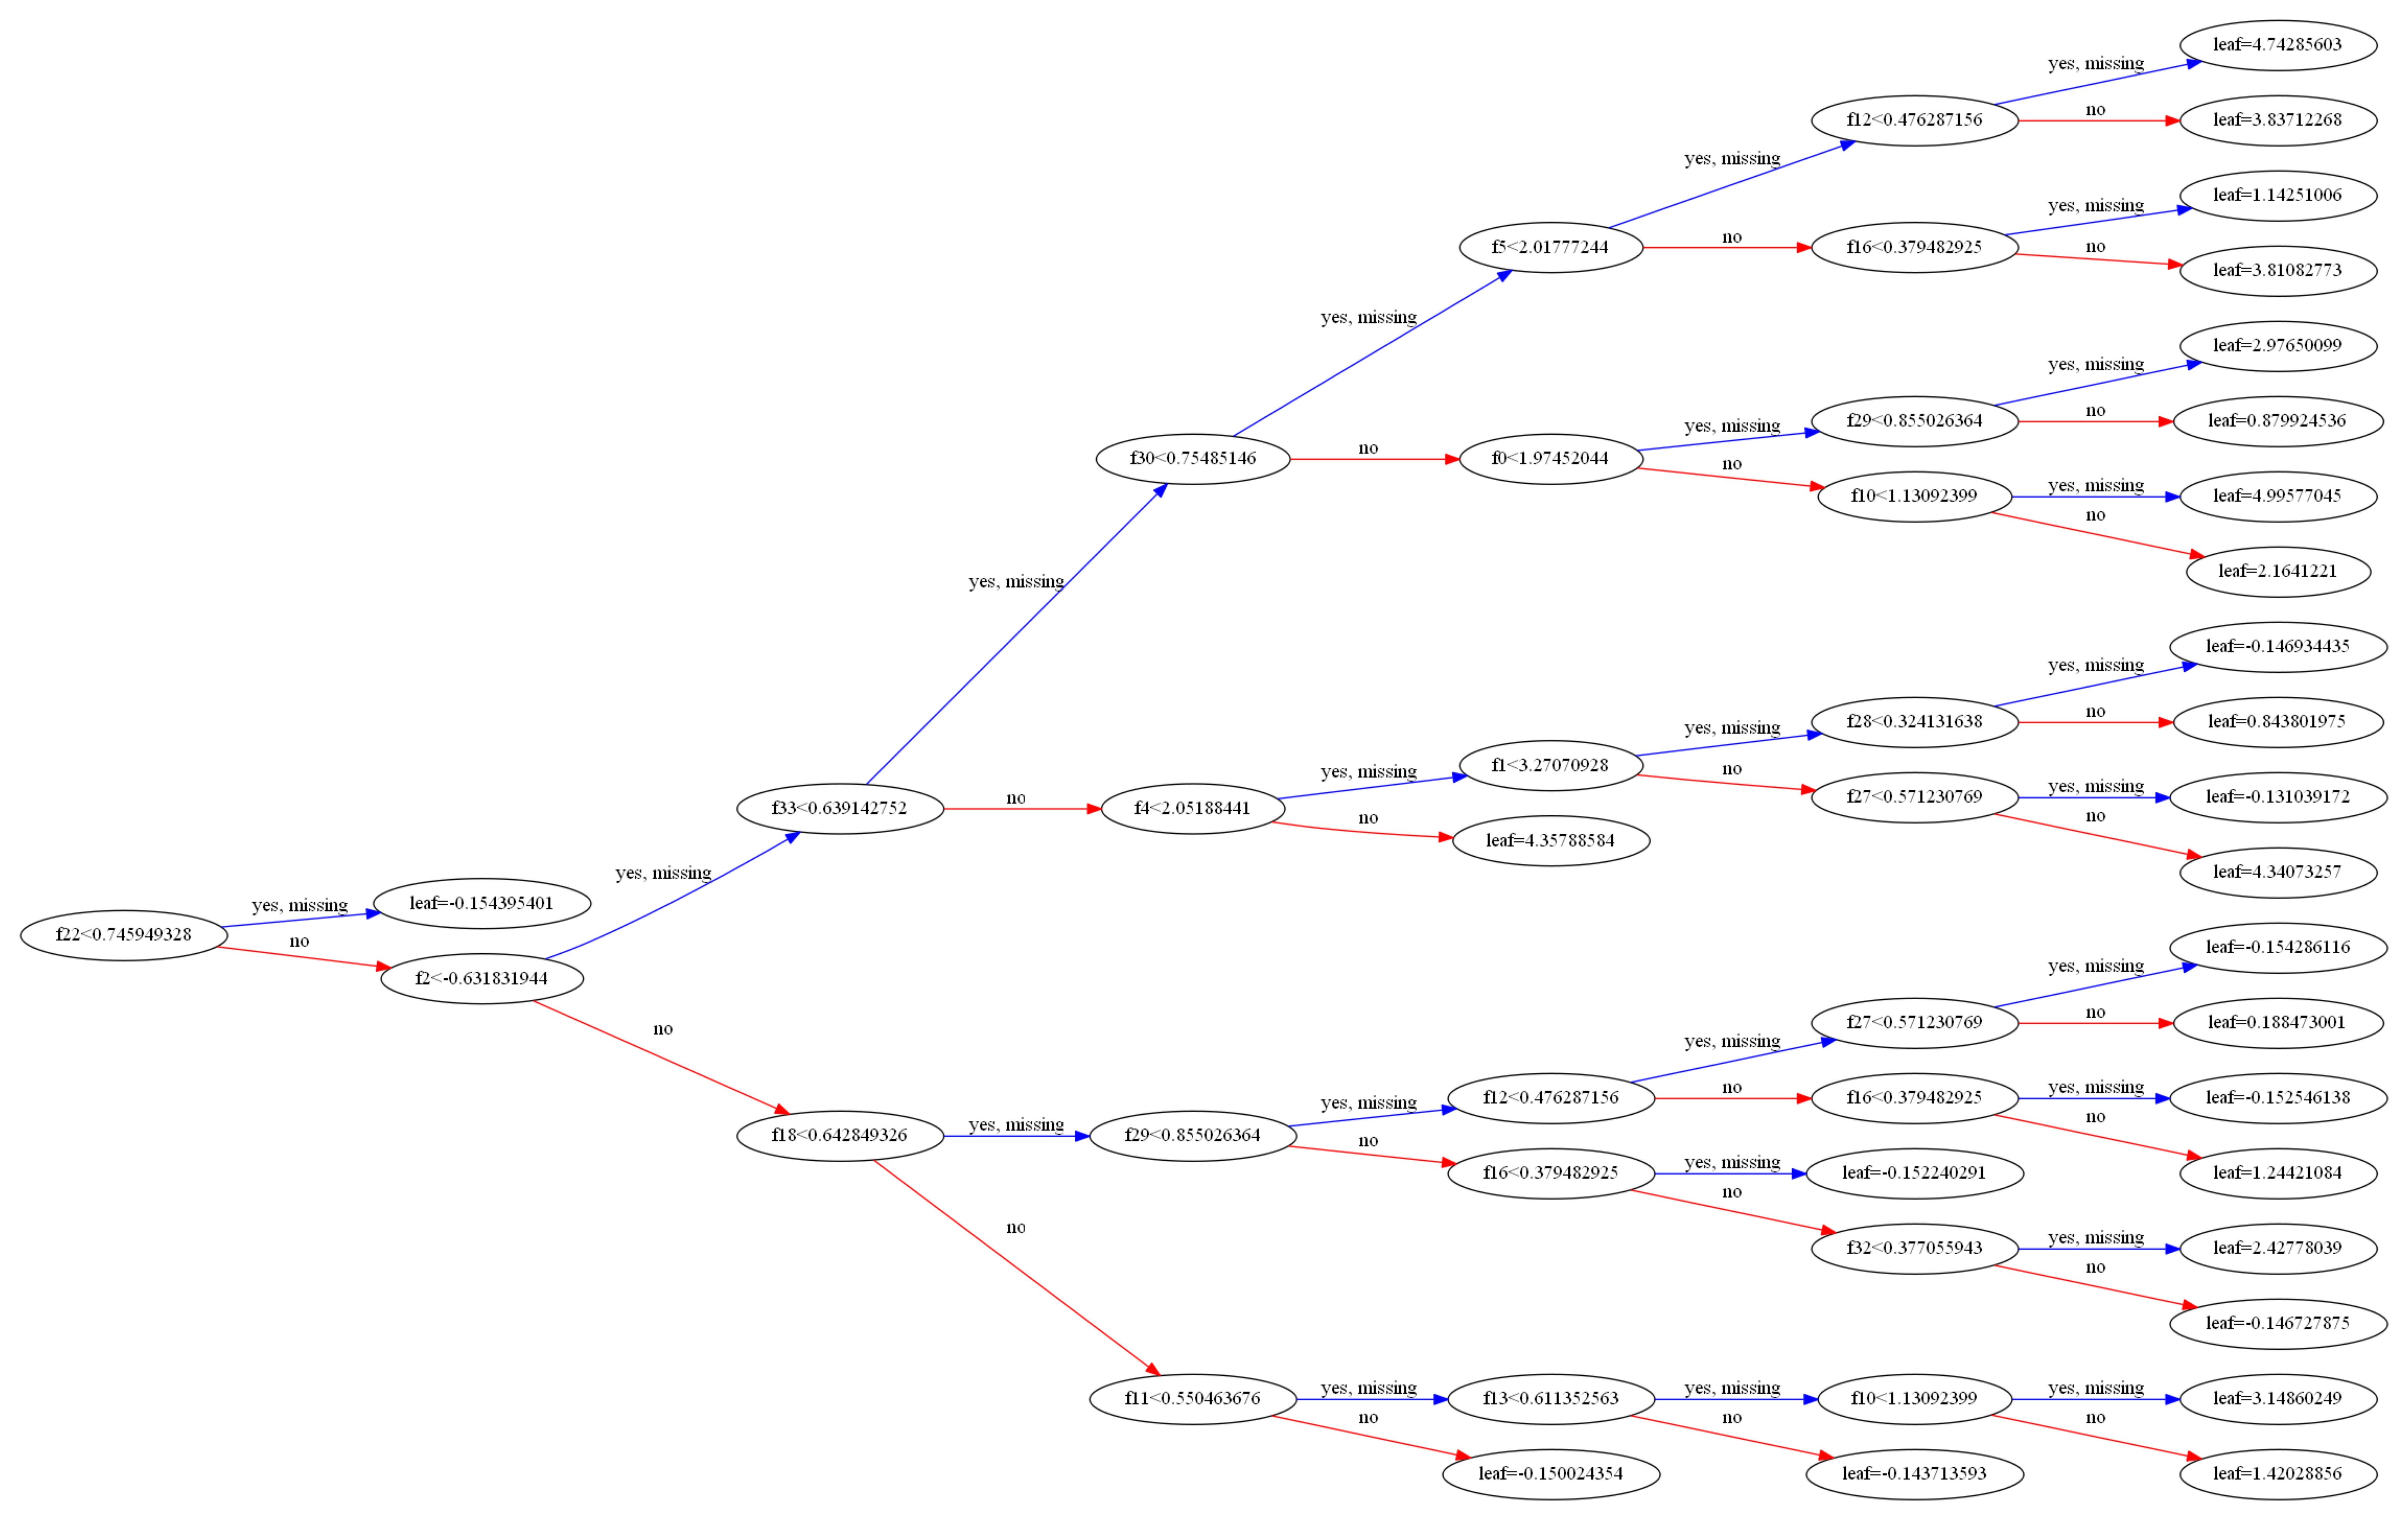

In [1233]:
from xgboost import plot_tree
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20), dpi=400)
plot_tree(xgbc, rankdir='LR', ax=ax)

In [1234]:
lgbc.booster_.save_model("LightGBM_model.txt")
xgbc.save_model('XGBoost_model.model')

In [1235]:
len(pd.Series(lgbc_pred).value_counts().keys())

35

In [1236]:
anw_ki = pd.DataFrame(pd.Series(xgbc_pred).value_counts().keys(), columns=['Anwendungscharakterisierung einer KI-Methode'])
anw_ki.to_excel('Anwendungscharakterisierung einer KI-Methode.xlsx')

# Entwicklung der Pipeline

In [1240]:
test_in = pd.read_excel("Charakterisierungen_v2.xlsx",sheet_name=4)

In [1241]:
test_in

Datenformat Datenqualität Verfügbarkeit von Zeit Anspruch auf Genauigkeit  \
0      Matrix        Normal                 Gering                   Gering   

   Datentyp Typ der Zielgröße Rechenkapazität Datenmenge  \
0  Gelabelt       Kategorisch          Normal    Neutral   

  Folge von Entscheidungen Anzahl an Dimensionen (Features)  
0                     nein                           Mittel

In [1242]:
test_in = transform_dummy(test_in.copy(), test_in.columns)

In [1243]:
test_in

Datenformat_Matrix  Datenqualität_Normal  Verfügbarkeit von Zeit_Gering  \
0                   1                     1                              1   

   Anspruch auf Genauigkeit_Gering  Datentyp_Gelabelt  \
0                                1                  1   

   Typ der Zielgröße_Kategorisch  Rechenkapazität_Normal  Datenmenge_Neutral  \
0                              1                       1                   1   

   Folge von Entscheidungen_nein  Anzahl an Dimensionen (Features)_Mittel  
0                              1                                        1

In [1244]:
different = [col for col in X.columns if col not in test_in.columns]

In [1245]:
different

['Datenformat_Bild',
 'Datenformat_Keine',
 'Datenformat_Text',
 'Datenformat_Ton',
 'Datenformat_Video',
 'Datenqualität_Gering',
 'Datenqualität_Hoch',
 'Datenqualität_Keine',
 'Datenqualität_Sehr Hoch',
 'Verfügbarkeit von Zeit_Hoch',
 'Verfügbarkeit von Zeit_Normal',
 'Verfügbarkeit von Zeit_Sehr Hoch',
 'Anspruch auf Genauigkeit_Hoch',
 'Anspruch auf Genauigkeit_Normal',
 'Anspruch auf Genauigkeit_Sehr Hoch',
 'Datentyp_Feedback-Signal',
 'Datentyp_Gemischt',
 'Datentyp_Nicht gelabelt',
 'Typ der Zielgröße_Keine',
 'Typ der Zielgröße_Numerisch',
 'Rechenkapazität_Gering',
 'Rechenkapazität_Hoch',
 'Rechenkapazität_Sehr Hoch',
 'Datenmenge_Groß',
 'Datenmenge_Keine',
 'Datenmenge_Klein',
 'Datenmenge_Sehr Groß',
 'Folge von Entscheidungen_ja',
 'Anzahl an Dimensionen (Features)_Gering',
 'Anzahl an Dimensionen (Features)_Hoch']

In [1246]:
test_in_ = pd.DataFrame(data = np.zeros((1,len(different))), columns=different)
test_in = pd.concat([test_in, test_in_], axis=1)
test_in = test_in.reindex(columns=X.columns)
test_in = scaler.transform(test_in)

In [1247]:
lgbc_predictions = lgbc.predict_proba(test_in)
pd.DataFrame(lgbc.classes_[lgbc_predictions.argsort()[0][-2:]]).to_excel('Problem_X_LightGBM.xlsx')
lgbc.classes_[lgbc_predictions.argsort()[0][-2:]]

array(["['Strukturiert', 'Linear Models', 'Klassifikation', 'Überwachtes Lernen']",
       "['Strukturiert', 'K-Nearest Neighbors ', 'Klassifikation', 'Überwachtes Lernen']"],
      dtype=object)

In [1248]:
xgbc_predictions = xgbc.predict_proba(test_in)
xgbc.classes_[xgbc_predictions.argsort()[0][-2:]]
pd.DataFrame(xgbc.classes_[xgbc_predictions.argsort()[0][-2:]]).to_excel('Problem_X_XGBoost.xlsx')
xgbc.classes_[xgbc_predictions.argsort()[0][-2:]]

array(["['Strukturiert', 'Linear Models', 'Klassifikation', 'Überwachtes Lernen']",
       "['Strukturiert', 'K-Nearest Neighbors ', 'Klassifikation', 'Überwachtes Lernen']"],
      dtype=object)